In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import csv

import pandas as pd
import numpy as np

In [2]:
#import cleaned dataset
#%%time
df_1999 = pd.read_csv('muxViz_1999-2005_community_perLayer_table.csv', delimiter=';')
df_2006 = pd.read_csv('muxViz_2006-2012_community_perLayer_table.csv', delimiter=';')
print('rows:',len(df_1999))
print('rows:',len(df_2006))

rows: 25332
rows: 56772


In [3]:
df_1999.columns

Index(['Layer', 'Node', 'Label', 'Community'], dtype='object')

In [14]:
def community_graph(data, layer, title):
    #'Community Distribution (1999-2005)'
    df_1 = data[data.Layer==str(layer)]
    print(df_1.shape)
    
    #filter for only communities larger than 0
    df_1 = df_1[df_1.Community>=1]
    print(df_1.shape)
    
    #df for plotting
    df_1_plot = pd.DataFrame(df_1.groupby('Community')['Node'].count()).reset_index().rename({'Node':'Count'}, axis=1)
    df_1_plot = df_1_plot.sort_values(by=['Count'], ascending=False)
    df_1_plot = df_1_plot.reset_index().drop('index',axis=1)
    
    #some additional outputs
    print('mean:', df_1_plot['Count'].mean())
    print('count:', df_1_plot['Count'].count())
    new = df_1_plot[(df_1_plot['Count']>=200) & (df_1_plot['Count']<=1000)]
    print('communities in that range', (len(new['Count'])/len(df_1_plot['Count']))*100, 
          '-% /// that being (#com): ',len(new['Count']))
    print(df_1_plot.head())
    
    #plot
    plt.plot(df_1_plot['Community'], df_1_plot['Count'],'o', color='black')
    plt.title(title,fontsize = 15)
    plt.xlabel('Community')
    plt.ylabel('Count of Community')

(14193, 4)
(14155, 4)
mean: 13.366383380547687
count: 1059
communities in that range 0.84985835694051 -% /// that being (#com):  9
   Community  Count
0        906    410
1        129    336
2        928    316
3        910    304
4        897    276


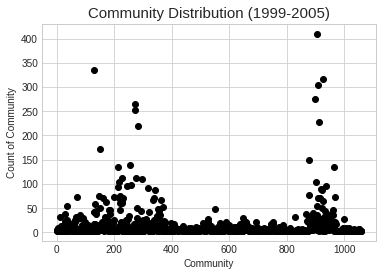

In [15]:
community_graph(df_2006, 'Aggr', 'Community Distribution (1999-2005)')